In [13]:
import os, sys
sys.path.append(os.path.split(os.getcwd())[0])

In [14]:
import scripts.collect_data as collect
import scripts.transform_data as transform
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from glob import glob

# Download and transform data associated with models

|     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|
|Infected |Recovered | Deaths | Population | Temperature | Humidity | Wind Speed | Test Rate |
|IRD[0] | IRD[1] | IRD[2] | pop| THW[0] | THW[1] | THW[2] | test 

## Download John's Hopkins Infection, Recovery and Death data

In [3]:
collect.IRD()

Infection, Recovery and Death data saved @ /data/COVID-19/covid19/data/IRD


'/data/COVID-19/covid19/data/IRD'

In [4]:
IRD = transform.IRD(min_confirmed=100, min_recovered=0, min_deaths=0)

## Download weather data using Dark Sky API (max 1000/day)

In [41]:
collect.weather()

100%|██████████| 264/264 [13:13<00:00,  3.01s/it]

Weather data saved @ /data/COVID-19/covid19/data/weather/json/


'/data/COVID-19/covid19/data/weather/json/'

In [42]:
THW = transform.weather(update=True)

100%|██████████| 264/264 [00:20<00:00, 12.64it/s]


Weather data saved @ /data/COVID-19/covid19/data/weather


In [43]:
THW[0]

1/22/20    1/23/20    1/24/20  \
Country/Region                                                        
Afghanistan                          9.908750   9.908750   9.908750   
Albania                              6.367500   6.367500   6.367500   
Algeria                             22.660417  22.660417  22.660417   
Andorra                              5.491667   5.491667   5.491667   
Angola                              22.600833  22.600833  22.600833   
...                                       ...        ...        ...   
France / Saint Pierre and Miquelon  -5.152083  -2.133750  -0.276667   
South Sudan                         26.382917  25.572500  25.743333   
Western Sahara                      14.366250  16.211250  18.001667   
Sao Tome and Principe               26.849167  27.046250  26.746667   
Yemen                                     NaN        NaN        NaN   

                                      1/25/20    1/26/20    1/27/20  \
Country/Region                                                        
Afghanistan                          9.908750   9.908750   9.908750   
Albania                              6.367500   6.367500   6.367500   
Algeria                             22.660417  22.660417  22.660417   
Andorra                              5.491667   5.491667   5.491667   
Angola                              22.600833  22.600833  22.600833   
...                                       ...        ...        ...   
France / Saint Pierre and Miquelon  -3.060417  -0.559583   1.756667   
South Sudan                         27.002083  28.325833  27.887500   
Western Sahara                      18.052500  17.400417  17.236667   
Sao Tome and Principe               26.637917  26.914167  26.887083   
Yemen                                     NaN        NaN        NaN   

                                      1/28/20    1/29/20    1/30/20  \
Country/Region                                                        
Afghanistan                          9.908750   9.908750   9.908750   
Albania                              6.367500   6.367500   6.367500   
Algeria                             22.660417  22.660417  22.660417   
Andorra                              5.491667   5.491667   5.491667   
Angola                              22.600833  22.600833  22.600833   
...                                       ...        ...        ...   
France / Saint Pierre and Miquelon  -0.192917  -1.829167  -2.558333   
South Sudan                         26.995000  27.057917  27.706250   
Western Sahara                      20.045000  21.201667  19.498750   
Sao Tome and Principe               26.918750  27.235833  27.305417   
Yemen                                     NaN        NaN        NaN   

                                      1/31/20  ...     4/1/20     4/2/20  \
Country/Region                                 ...                         
Afghanistan                          9.908750  ...  10.455833  11.140417   
Albania                              6.367500  ...   6.099167   5.885833   
Algeria                             22.660417  ...  23.765000  24.420833   
Andorra                              5.491667  ...   6.207500   5.969583   
Angola                              22.600833  ...  23.860417  21.522917   
...                                       ...  ...        ...        ...   
France / Saint Pierre and Miquelon  -3.030417  ...   3.360417   3.341250   
South Sudan                         28.875833  ...  31.995000  33.312500   
Western Sahara                      18.992917  ...  24.073750  24.551667   
Sao Tome and Principe               26.985417  ...  28.077083  27.659167   
Yemen                                     NaN  ...        NaN        NaN   

                                       4/3/20     4/4/20     4/5/20  \
Country/Region                                                        
Afghanistan                         14.014583  12.852083  13.083333   
Albania                              8.513750  11.061250  11.970

## Download population data from Worldometer

In [44]:
collect.population()

Population data saved @ /data/COVID-19/covid19/data/population/populations_raw.csv


'/data/COVID-19/covid19/data/population/populations_raw.csv'

In [23]:
pop = transform.population()
len(pop)

Number of unmatched regions : 46
Population data saved @ /data/COVID-19/covid19/data/population/populations.csv


1

In [24]:
pop

Australia / New South Wales  Australia / Queensland  \
Population                      8117976                 5115451   

            Australia / South Australia  Australia / Victoria  \
Population                      1756494               6629870   

            Australia / Western Australia  Denmark / Faroe Islands  \
Population                        2630557                    51783   

            France / Guadeloupe  France / Reunion  \
Population               395700            859959   

            United Kingdom / Channel Islands  West Bank and Gaza  ...  \
Population                            170499             3340143  ...   

              Libya  Guinea-Bissau      Mali  Botswana   Burundi  \
Population  6871292        1968001  20250833   2351627  11890784   

            Sierra Leone    Malawi  South Sudan  Western Sahara     Yemen  
Population       7976983  19129952     11193725          597339  29825964  

[1 rows x 181 columns]

# BCG ATLAS Data

BCG Atals data was copy and pasted manually into separate csv files. Here is the processing of them.

In [76]:
WHO_df = pd.read_csv('../data/BCG/WHO_BCG_policy.csv')

In [103]:
years = WHO_df.iloc[0].values[1:].astype(int)
countries = WHO_df[WHO_df.columns.values[0]].values[1:]
data = WHO_df.values[1:,1:].astype(float)
who_df = pd.DataFrame(data.T, columns=countries, index=years)

In [109]:
who_df.T[2018]

Afghanistan                           78.0
Albania                               99.0
Algeria                               99.0
Angola                                86.0
Argentina                             93.0
                                      ... 
Venezuela (Bolivarian Republic of)    92.0
Viet Nam                              95.0
Yemen                                 64.0
Zambia                                91.0
Zimbabwe                              95.0
Name: 2018, Length: 167, dtype: float64

In [117]:
who_df.T[who_df.T[2018].isnull()][2018].index

Index(['Austria', 'Czechia', 'Finland', 'France', 'Greece', 'Ireland',
       'Israel', 'Malta', 'Portugal', 'Slovakia', 'Slovenia'],
      dtype='object')

In [15]:
files = glob('../data/BCG/BCG/*.csv')

In [16]:
bcg = {}
for i in range(len(files)):
    df = pd.read_csv(files[i], skiprows=1)
    country = os.path.split(files[i])[1][:-4]
    bcg[country] = df[df[df.columns[0]]=='Current BCG vaccination?'][df.columns[2]].values[0]
    
WBIG = {}
for i in range(len(files)):
    df = pd.read_csv(files[i], skiprows=1)
    country = os.path.split(files[i])[1][:-4]
    WBIG[country] = df[df[df.columns[0]]=='Income group (World Bank)'][df.columns[2]].values[0]
    
start_year = {}
for i in range(len(files)):
    df = pd.read_csv(files[i], skiprows=1)
    country = os.path.split(files[i])[1][:-4]
    try:
        start_year[country] = df[df[df.columns[0]]=='Which year was vaccination introduced?'][df.columns[2]].values[0]
        if 's' in start_year[country]:
            start_year[country] = start_year[country][:-2]+str(5)
    except:
        start_year[country] = 'N/A'
        
stop_year = {}
for i in range(len(files)):
    df = pd.read_csv(files[i], skiprows=1)
    country = os.path.split(files[i])[1][:-4]
    try:
        stop_year[country] = df[df[df.columns[0]]=='Year BCG stopped?'][df.columns[2]].values[0]
    except:
        stop_year[country] = 'N/A'
        
coverage = {}
for i in range(len(files)):
    df = pd.read_csv(files[i], skiprows=1)
    country = os.path.split(files[i])[1][:-4]
    try:
        coverage[country] = df[df[df.columns[0]]=='BCG coverage (%)'][df.columns[2]].values[0]
    except:
        coverage[country] = 'N/A'
        
changes = {}
for i in range(len(files)):
    df = pd.read_csv(files[i], skiprows=1)
    country = os.path.split(files[i])[1][:-4]
    try:
        changes[country] = df[df[df.columns[0]]=='Year of changes to BCG schedule'][df.columns[2]].values[0]
    except:
        changes[country] = 'N/A'
        
details = {}
for i in range(len(files)):
    df = pd.read_csv(files[i], skiprows=1)
    country = os.path.split(files[i])[1][:-4]
    try:
        details[country] = df[df[df.columns[0]]=='Details of changes'][df.columns[2]].values[0]
    except:
        details[country] = 'N/A'

In [17]:
bcg_df = pd.DataFrame([bcg[key] for key in bcg], columns=['Current BCG Policy'], index=bcg.keys())

In [25]:
bcg_df['World Bank Income Group'] = bcg_df.index.map(WBIG)
bcg_df['Start Year'] = bcg_df.index.map(start_year)
bcg_df['End Year'] = bcg_df.index.map(stop_year)
bcg_df['Coverage'] = bcg_df.index.map(coverage)
bcg_df['Changes'] = bcg_df.index.map(changes)
bcg_df['Change Details'] = bcg_df.index.map(details)
bcg_df['Deaths 4/5/20'] = bcg_df.index.map(dict(zip(IRD[2].index.values, IRD[2]['4/5/20'])))
bcg_df['Population'] = bcg_df.index.map(dict(zip(pop.columns.values, pop.values[0])))
bcg_df.index.rename('Country', inplace=True)

In [26]:
bcg_df['Start Year (INT)'] = bcg_df['Start Year'].apply(pd.to_numeric, args=('coerce',))
bcg_df['End Year (INT)'] = bcg_df['End Year'].apply(pd.to_numeric, args=('coerce',))

Manually add start years for countries where more information as been gathered from Details column or would not be coerced properly

In [27]:
bcg_df.T['Taiwan*']['Start Year (INT)'] = 1951
bcg_df.T['Ukraine']['Start Year (INT)'] = 1980
bcg_df.T['Japan']['Start Year (INT)'] = 1947
bcg_df.T['Singapore']['Start Year (INT)'] = 1955

In [28]:
def convert_IG(IG):
    IG = IG.lower()
    if 'high' in IG:
        return 3
    elif 'upper' in IG:
        return 2
    elif 'lower' in IG:
        return 1
    elif 'low income' in IG:
        return 0
    else:
        return -1

In [29]:
bcg_df['WBIG'] = bcg_df['World Bank Income Group'].apply(convert_IG)

In [36]:
len(bcg_df[bcg_df['Coverage']!='N/A']['Coverage'].values)

95

In [39]:
len(bcg_df[bcg_df['Start Year']!='N/A'])

50

In [44]:
len(bcg_df[~bcg_df['Start Year (INT)'].isnull()]), len(bcg_df[bcg_df['Start Year (INT)'].isnull()])

(42, 68)

In [43]:
len(bcg_df)

110

In [51]:
def clean_percentage(string):
    remove_chars = '%~>'
    new_string = ''
    for char in string:
        if char not in remove_chars:
            new_string += char
        else:
            continue
    try:
        return float(new_string)
    except:
        new_string

In [52]:
bcg_df['Coverage (float)'] = bcg_df['Coverage'].apply(clean_percentage)

In [63]:
bcg_df['Coverage (float)'].T['Ukraine'] = 30.0
bcg_df['Coverage (float)'].T['South Africa'] = 90.5
bcg_df['Coverage (float)'].T['Austria'] = 99.9
bcg_df['Coverage (float)'].T['Sweden'] = 26.4
bcg_df['Coverage (float)'].T['Columbia'] = 85.0

In [68]:
# bcg_df[['Coverage', 'Start Year', 'Coverage (float)']].tail(50)

In [ ]:
pd.set_option()
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)

In [214]:
set(IRD[2][IRD[2].max(axis=1)>20].index) - set()

{'Albania',
 'Algeria',
 'Andorra',
 'Argentina',
 'Australia / New South Wales',
 'Austria',
 'Bangladesh',
 'Belgium',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Chile',
 'Colombia',
 'Croatia',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Honduras',
 'Hungary',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Japan',
 'Korea, South',
 'Lithuania',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Moldova',
 'Morocco',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Pakistan',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'San Marino',
 'Saudi Arabia',
 'Serbia',
 'Slovenia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Tunisia',
 'Turkey',
 'US',
 'Ukraine',
 'United Kingdom'}

In [195]:
missing_bcg = ['Norway', 'Germany', 'Bolivia', 'US', 'Greece', 'Switzerland',
               'United Arab Emirates', 'Netherlands', 'France', 'Belgium', 'Honduras',
               'Spain', 'Niger']#, 'Czechia']

In [206]:
who_df[who_df.T.index.intersection(missing_bcg)].T.index

Index(['France', 'Greece', 'Honduras', 'Niger', 'United Arab Emirates'], dtype='object')

In [211]:
bcg_df[bcg_df['Coverage (float)'].isnull()].T[missing_bcg].T

Current BCG Policy World Bank Income Group Start Year  \
Country                                                                      
Norway                               No             High income        N/A   
Germany                              No             High income       1961   
Bolivia                             Yes     Lower middle income        N/A   
US                                   No             High income        N/A   
Greece                              Yes             High income        N/A   
Switzerland                          No             High income       1965   
United Arab Emirates                Yes             High income        N/A   
Netherlands                          No             High income        N/A   
France                               No             High income       1950   
Belgium                              No             High income        N/A   
Honduras                            Yes     Lower middle income        N/A   
Spain                                No             High income       1965   
Niger                               Yes              Low income        N/A   

                     End Year Coverage                    Changes  \
Country                                                             
Norway                   2009   Unkown                       2009   
Germany                  1998       DK                1951 & 1975   
Bolivia                   N/A      N/A           1989, 1995, 2013   
US                        N/A      N/A                       None   
Greece                    N/A       DK                1951 & 1975   
Switzerland              1987      N/A  1960s, 1970s, 1987, 1996    
United Arab Emirates      N/A      N/A                        N/A   
Netherlands               N/A      N/A           1979, 2005, 2016   
France                   2007      N/A           2004, 2006, 2007   
Belgium                   N/A      N/A           1989, 1995, 2013   
Honduras                  N/A       DK                1951 & 1975   
Spain                    1981      N/A                       1981   
Niger                     N/A      N/A           1979, 2005, 2016   

                                                         Change Details  \
Country                                                                   
Norway                BCG Vaccination no longer part of National Vac...   
Germany               Histories different for West and East Germany ...   
Bolivia               1989: Stopped vaccinations for healthcare or o...   
US                                                                 None   
Greece                Histories different for West and East Germany ...   
Switzerland           1960s: BCG vaccination for tuberculin-negative...   
United Arab Emirates                                                N/A   
Netherlands           1979: Discontinuation of vaccination healthcar...   
France                2004: Stopped revaccinations of children and a...   
Belgium               1989: Stopped vaccinations for healthcare or o...   
Honduras              Histories different for West and East Germany ...   
Spain                                 Systematic BCG vaccination ceased   
Niger                 1979: Discontinuation of vaccination healthcar...   

                     Deaths 4/5/20   Population Start Year (INT)  \
Country                                                            
Norway                          71  5.42124e+06              NaN   
Germany                       1584  8.37839e+07             1961   
Bolivia                         10   1.1673e+07              NaN   
US                            9619  3.31003e+08              NaN   
Greece                          73  1.04231e+07              NaN   
Switzerland                    715  8.65462e+06             1965   
United Arab Emirates            10   9.8904e+06              NaN   
Netherlands                   1766  1.71349e+07              NaN   
France  

In [194]:
bcg_df[bcg_df['Coverage (float)'].isnull()][['Start Year', 'End Year', 'Change Details']]

Start Year  \
Country                                                                   
Sri Lanka                                                           N/A   
Canada                2011 data: 1933-1954 in some provinces/territori5   
Norway                                                              N/A   
Guatemala                                                           N/A   
Germany                                                            1961   
Syria                                                               N/A   
Bolivia                                                             N/A   
Ghana                                                               N/A   
Gabon                                                               N/A   
US                                                                  N/A   
Greece                                                              N/A   
Switzerland                                                        1965   
United Arab Emirates                                                N/A   
Jamaica                                                             N/A   
Czech Replublic                                                    1953   
Netherlands                                                         N/A   
France                                                             1950   
Guyana                                                              N/A   
Belgium                                                             N/A   
Honduras                                                            N/A   
Spain                                                              1965   
Niger                                                               N/A   
Italy                  2011 data: 1970 (not national, only provincial)    

                                                               End Year  \
Country                                                                   
Sri Lanka                                                           N/A   
Canada                2011 data: 1960s-70s except for Inuit and many...   
Norway                                                             2009   
Guatemala                                                           N/A   
Germany                                                            1998   
Syria                                                               N/A   
Bolivia                                                             N/A   
Ghana                                                               N/A   
Gabon                                                               N/A   
US                                                                  N/A   
Greece                                                              N/A   
Switzerland                                                        1987   
United Arab Emirates                                                N/A   
Jamaica                                                             N/A   
Czech Replublic                                                    2010   
Netherlands                                                         N/A   
France                                                             2007   
Guyana                                                              N/A   
Belgium                                                             N/A   
Honduras                                                            N/A   
Spain                                                              1981   
Niger                                                               N/A   
Italy                   2011 data: 2001 (not national, only provincial)   

                                                         Change Details  
Country                                                                  
Sri Lanka                             Systematic BCG vaccination ceased  
Canada                2011 data: Discontinuation of routine BCG vacc...  
Norway       

In [212]:
bcg_df.describe()

Deaths 4/5/20    Population  Start Year (INT)  End Year (INT)  \
count      89.000000  1.020000e+02         42.000000       12.000000   
mean      515.955056  4.962533e+07       1962.238095     1996.583333   
std      1929.561802  1.457083e+08         16.348058       12.176418   
min         2.000000  3.393100e+04       1928.000000     1975.000000   
25%         8.000000  4.470522e+06       1951.000000     1986.750000   
50%        28.000000  1.145812e+07       1955.000000     2001.500000   
75%        94.000000  3.989896e+07       1976.000000     2006.250000   
max     12641.000000  1.380004e+09       1999.000000     2010.000000   

             WBIG  Coverage (float)  
count  110.000000         87.000000  
mean     2.027273         89.671264  
std      0.952631         14.136946  
min      0.000000         26.400000  
25%      1.000000         88.450000  
50%      2.000000         94.000000  
75%      3.000000         98.000000  
max      3.000000        100.000000

In [32]:
bcg_df.to_csv('../data/BCG/BCG_ATLAS.csv')

Selection based on start year cut of 1955

In [33]:
NONBCG = ['Indonesia', 'US', 'Italy', 'Netherlands', 'Belgium', 
          'Lebanon']#, 'Iran', 'Ecuador', 'Andorra', 'Luxembourg']
BCG = ['Croatia', 'Peru', 'Slovenia', 'India', 'Romania', 'Finland', 
       'United Kingdom', 'Poland', 'Turkey', 'Bulgaria', 'Mexico', 
       'Ireland', 'France', 'Bosnia and Herzegovina', 'Austria', 'Denmark', 
       'Brazil']#, 'Germany', 'Jordan', 'Kazakhstan']

# Age Distribution

In [155]:
columns=['Variant','Region,Subregion,Country','Notes','Country code','Type','Parent code',
         'Reference date (as of 1July)','0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39',
         '40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+']
df = pd.read_excel('../data/population/WPP2019_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.xlsx', skiprows=406, index_col=0)
df.columns =  columns

In [165]:
age_df = df[(df['Reference date (as of 1July)']==2020) & (df['Type']=='Country/Area')]
age_df.drop(columns=['Variant', 'Notes', 'Country code', 'Type', 'Parent code', 'Reference date (as of 1July)'], 
            inplace=True)
age_df.set_index(age_df.columns[0], inplace=True, )
age_df.index.rename('Country', inplace=True)
age_df *= 1000

In [181]:
age_cbins = np.arange(2.5, 105, 5)
age_prob = age_df.T.values/age_df.T.values.sum(axis=0)

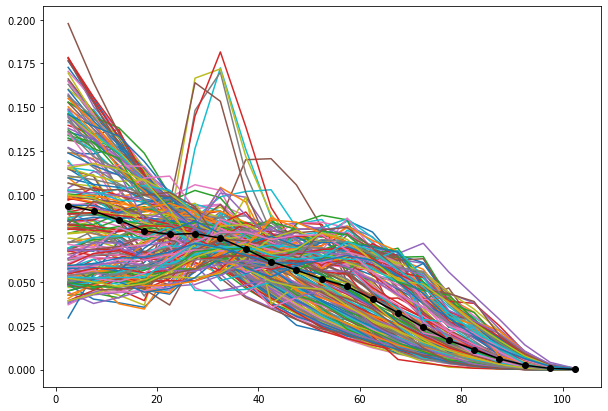

In [201]:
plt.figure(figsize=(10,7))
plt.plot(age_cbins, age_prob);
plt.plot(age_cbins, np.mean(age_prob, axis=1), 'ko-')

## Dowload testing data from Wikipedia (changes daily)

Test data does not have Australia split up. 

It does have Canada split up but using abbreviations.

In [47]:
test_fp = collect.testing()

ValueError: cannot copy sequence with size 7 to array axis with dimension 6

In [ ]:
test = transform.testing()

In [ ]:
test

## Take the intersection of all the DataFrames based on region (in place)

In [51]:
keep = transform.intersect_dfs([test, pop, *THW, *IRD])
len(keep), len(pop)

(63, 63)

# Now all our data in downloaded and transformed into nice DataFrames of the same size

|     |     |     |     |     |     |     |     |
|-----|-----|-----|-----|-----|-----|-----|-----|
|Infected |Recovered | Deaths | Population | Temperature | Humidity | Wind Speed | Test Rate |
|IRD[0] | IRD[1] | IRD[2] | pop| THW[0] | THW[1] | THW[2] | test 